In [1]:
#suppress deprecation warnings  
import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import pandas as pd 
import matplotlib.pyplot as plt 
import hddm 
from patsy import dmatrix 
import numpy as np
import seaborn as sns
import jupyterthemes as jt 
from collections import OrderedDict
from operator import itemgetter    

# print(hddm.__version__)

%matplotlib inline
plt.rcParams['figure.figsize'] = 30, 10
from sys import platform

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/67981492/'

In [3]:
!pwd
load_dir = home+'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'
# load_dir = '/Users/67981492/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'
fig_dir = home+'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/figures/'
print(load_dir)

/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs
/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/


In [4]:
v_cpp_subj_obs_reg=hddm.load(load_dir+'v_cpp_subj_obs_reg')
tr_cpp_subj_obs_reg=hddm.load(load_dir+'tr_cpp_subj_obs_reg')
a_cpp_subj_obs_reg=hddm.load(load_dir+'a_cpp_subj_obs_reg')

v_B_subj_obs_reg=hddm.load(load_dir+'v_B_subj_obs_reg')
tr_B_subj_obs_reg=hddm.load(load_dir+'tr_B_subj_obs_reg')
a_B_subj_obs_reg=hddm.load(load_dir+'a_B_subj_obs_reg')

In [5]:
one_ls_one_lt_dics = [v_cpp_subj_obs_reg.dic,
tr_cpp_subj_obs_reg.dic, 
a_cpp_subj_obs_reg.dic, 
v_B_subj_obs_reg.dic, 
tr_B_subj_obs_reg.dic,
a_B_subj_obs_reg.dic]

one_ls_one_lt_names = ['v_cpp', 'tr_cpp', 'a_cpp', 'v_B', 'tr_B', 'a_B']

In [6]:
v_cpp_B_subj_obs_reg=hddm.load(load_dir+'v_cpp_B_subj_obs_reg')
tr_cpp_B_subj_obs_reg=hddm.load(load_dir+'tr_cpp_B_subj_obs_reg')
a_cpp_B_subj_obs_reg=hddm.load(load_dir+'a_cpp_B_subj_obs_reg')

In [7]:
two_ls_one_lt_dics = [v_cpp_B_subj_obs_reg.dic, tr_cpp_B_subj_obs_reg.dic,
                    a_cpp_B_subj_obs_reg.dic]

two_ls_one_lt_names = ['v_cpp_B', 'tr_cpp_B', 'a_cpp_B']

In [8]:
v_a_B_subj_obs_reg=hddm.load(load_dir+'v_a_B_subj_obs_reg')
v_t_B_subj_obs_reg=hddm.load(load_dir+'v_t_B_subj_obs_reg')
v_a_cpp_subj_obs_reg=hddm.load(load_dir+'v_a_cpp_subj_obs_reg')

v_t_cpp_subj_obs_reg=hddm.load(load_dir+'v_t_cpp_subj_obs_reg')
a_t_B_subj_obs_reg=hddm.load(load_dir+'a_t_B_subj_obs_reg')
a_t_cpp_subj_obs_reg=hddm.load(load_dir+'a_t_cpp_subj_obs_reg')

In [9]:
one_ls_two_lt_dics = [v_a_B_subj_obs_reg.dic,v_t_B_subj_obs_reg.dic, 
                     v_a_cpp_subj_obs_reg.dic, v_t_cpp_subj_obs_reg.dic,
                     a_t_B_subj_obs_reg.dic,a_t_cpp_subj_obs_reg.dic]

one_ls_two_lt_names = ['v_a_B', 'v_t_B', 'v_a_cpp', 'v_t_cpp', 
                      'a_t_B', 'a_t_cpp']

In [10]:
v_B_a_cpp_subj_obs_reg=hddm.load(load_dir+'v_B_a_cpp_subj_obs_reg')
a_B_t_cpp_subj_obs_reg=hddm.load(load_dir+'a_B_t_cpp_subj_obs_reg')
a_cpp_t_B_subj_obs_reg=hddm.load(load_dir+'a_cpp_t_B_subj_obs_reg')
t_cpp_v_B_subj_obs_reg=hddm.load(load_dir+'t_cpp_v_B_subj_obs_reg')
v_cpp_a_B_subj_obs_reg=hddm.load(load_dir+'v_cpp_a_B_subj_obs_reg')
v_cpp_t_B_subj_obs_reg=hddm.load(load_dir+'v_cpp_t_B_subj_obs_reg')

In [11]:
two_ls_two_lt_dics = [v_B_a_cpp_subj_obs_reg.dic, a_B_t_cpp_subj_obs_reg.dic,
                     a_cpp_t_B_subj_obs_reg.dic, t_cpp_v_B_subj_obs_reg.dic, 
                     v_cpp_a_B_subj_obs_reg.dic, v_cpp_t_B_subj_obs_reg.dic]
two_ls_two_lt_names = ['v_B_a_cpp', 'a_B_t_cpp', 'a_cpp_t_B', 
                       't_cpp_v_B', 'v_cpp_a_B', 'v_cpp_t_B']

In [12]:
v_a_t_B_subj_obs_reg=hddm.load(load_dir+'v_a_t_B_subj_obs_reg')
v_a_B_t_cpp_subj_obs_reg=hddm.load(load_dir+'v_a_B_t_cpp_subj_obs_reg')

v_t_B_a_cpp_subj_obs_reg=hddm.load(load_dir+'v_t_B_a_cpp_subj_obs_reg')
v_B_a_t_cpp_subj_obs_reg=hddm.load(load_dir+'v_B_a_t_cpp_subj_obs_reg')

v_cpp_a_t_B_subj_obs_reg=hddm.load(load_dir+'v_cpp_a_t_B_subj_obs_reg')
a_t_B_v_cpp_subj_obs_reg=hddm.load(load_dir+'a_t_B_v_cpp_subj_obs_reg')

v_t_cpp_a_B_subj_obs_reg=hddm.load(load_dir+'v_t_cpp_a_B_subj_obs_reg')
v_a_cpp_t_B_subj_obs_reg=hddm.load(load_dir+'v_a_cpp_t_B_subj_obs_reg')

v_a_t_cpp_subj_obs_reg=hddm.load(load_dir+'v_a_t_cpp_subj_obs_reg')

In [13]:
two_ls_three_lt_dics = [ v_a_B_t_cpp_subj_obs_reg.dic, 
                       v_t_B_a_cpp_subj_obs_reg.dic, v_B_a_t_cpp_subj_obs_reg.dic,
                       v_cpp_a_t_B_subj_obs_reg.dic, a_t_B_v_cpp_subj_obs_reg.dic,
                       v_t_cpp_a_B_subj_obs_reg.dic, v_a_cpp_t_B_subj_obs_reg.dic
                       ]

two_ls_three_lt_names = ['v_a_t_B', 'v_a_B_t_cpp', 
                        'v_a_B_t_cpp','v_B_a_t_cpp',
                        'v_cpp_a_t_B', 'a_t_B_v_cpp', 
                        'v_t_cpp_a_B', 'v_a_cpp_t_B', 
                        'v_a_t_cpp']

In [14]:
one_ls_three_lt_dics = [v_a_t_cpp_subj_obs_reg.dic, v_a_t_B_subj_obs_reg.dic]
one_ls_three_lt_names = ['v_a_t_cpp', 'v_a_t_B']

In [15]:
all_dics = (one_ls_one_lt_dics + one_ls_two_lt_dics+ one_ls_three_lt_dics+
two_ls_one_lt_dics+ two_ls_two_lt_dics+ two_ls_three_lt_dics)
all_names = (one_ls_one_lt_names+ one_ls_two_lt_names+ one_ls_three_lt_names+
            two_ls_one_lt_names+ two_ls_two_lt_names+ two_ls_three_lt_names)

dics_dict = dict(zip(all_names,all_dics))
sorted_dics = list(sorted(dics_dict.items(), key=itemgetter(1)))
all_dics_df = pd.DataFrame(OrderedDict(sorted_dics),index=[0])

In [16]:
winning_model, worst_model = min(dics_dict, key=dics_dict.get), max(dics_dict, key=dics_dict.get)

In [17]:
winning_model, worst_model

('v_a_t_B', 'a_B')

In [18]:
all_dics_diff=all_dics_df.diff(axis=1)

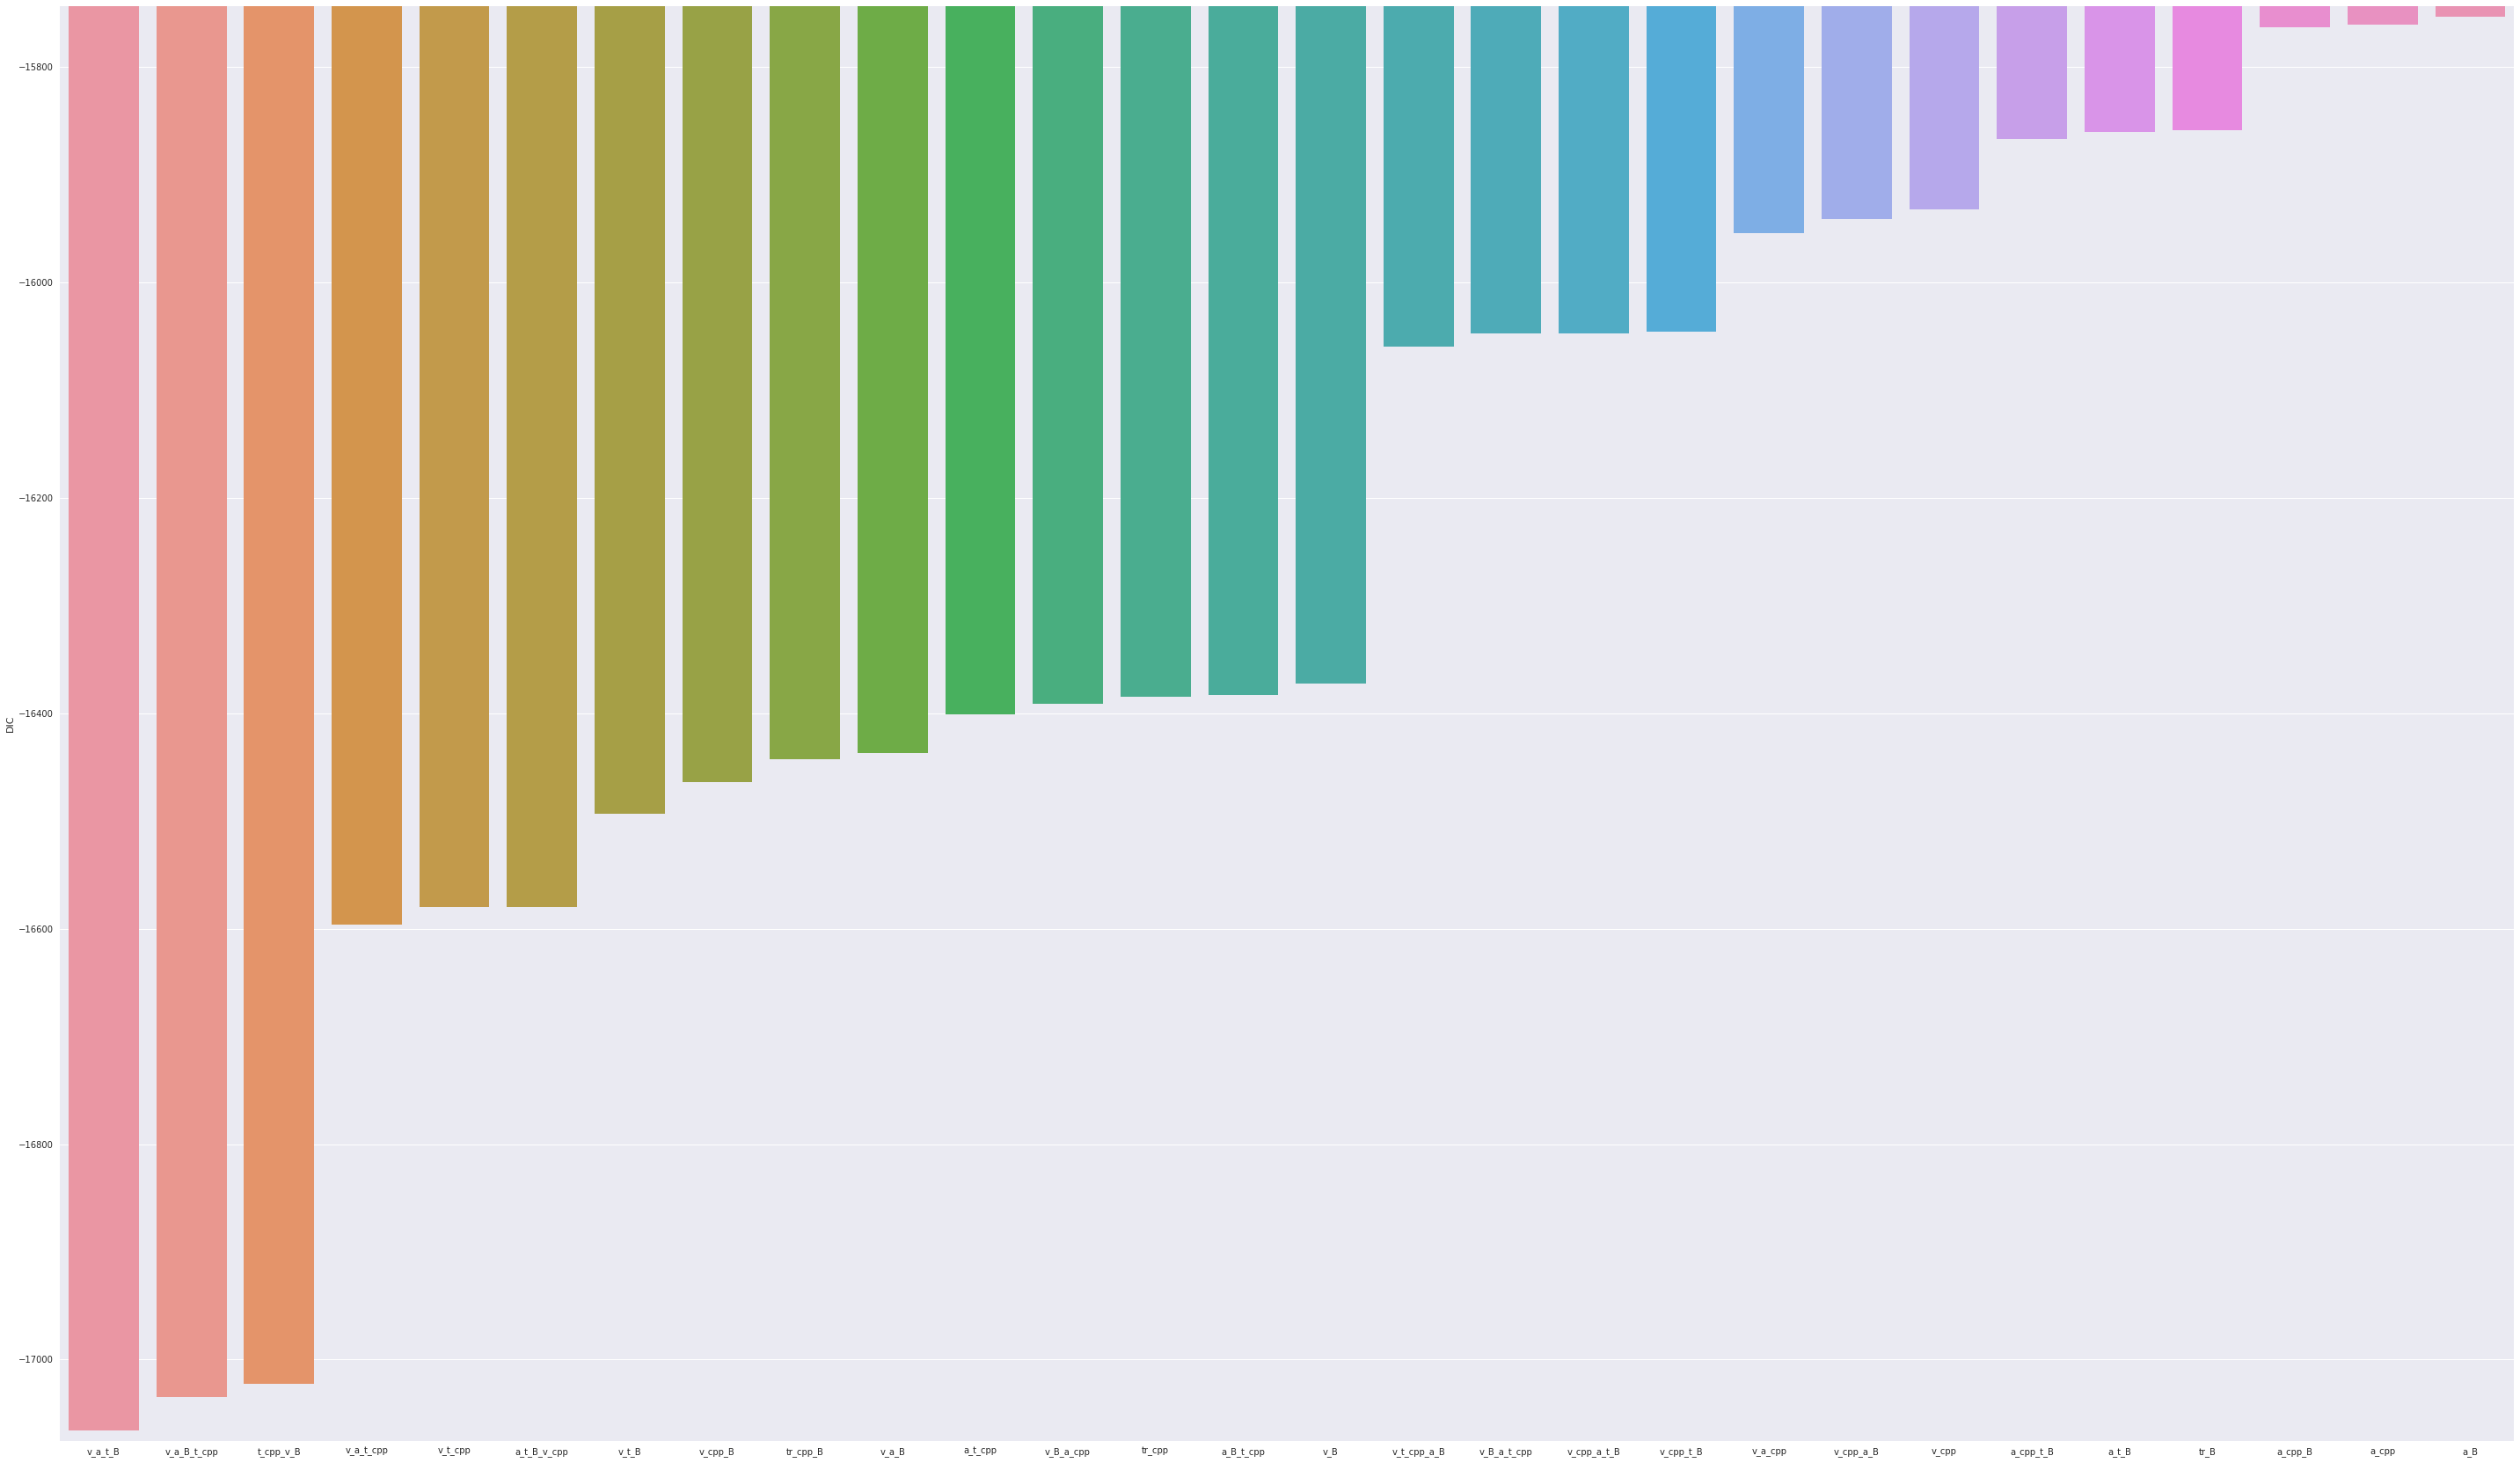

In [19]:
sns.set(font_scale=1)  
plt.figure(figsize=(50,30))
ax=sns.barplot(data=all_dics_df)
ax.set(ylabel='DIC')
plt.ylim([min(all_dics)-10, max(all_dics) + 10])
plt.savefig(fig_dir+'all_obs_reg_models_dics.pdf')

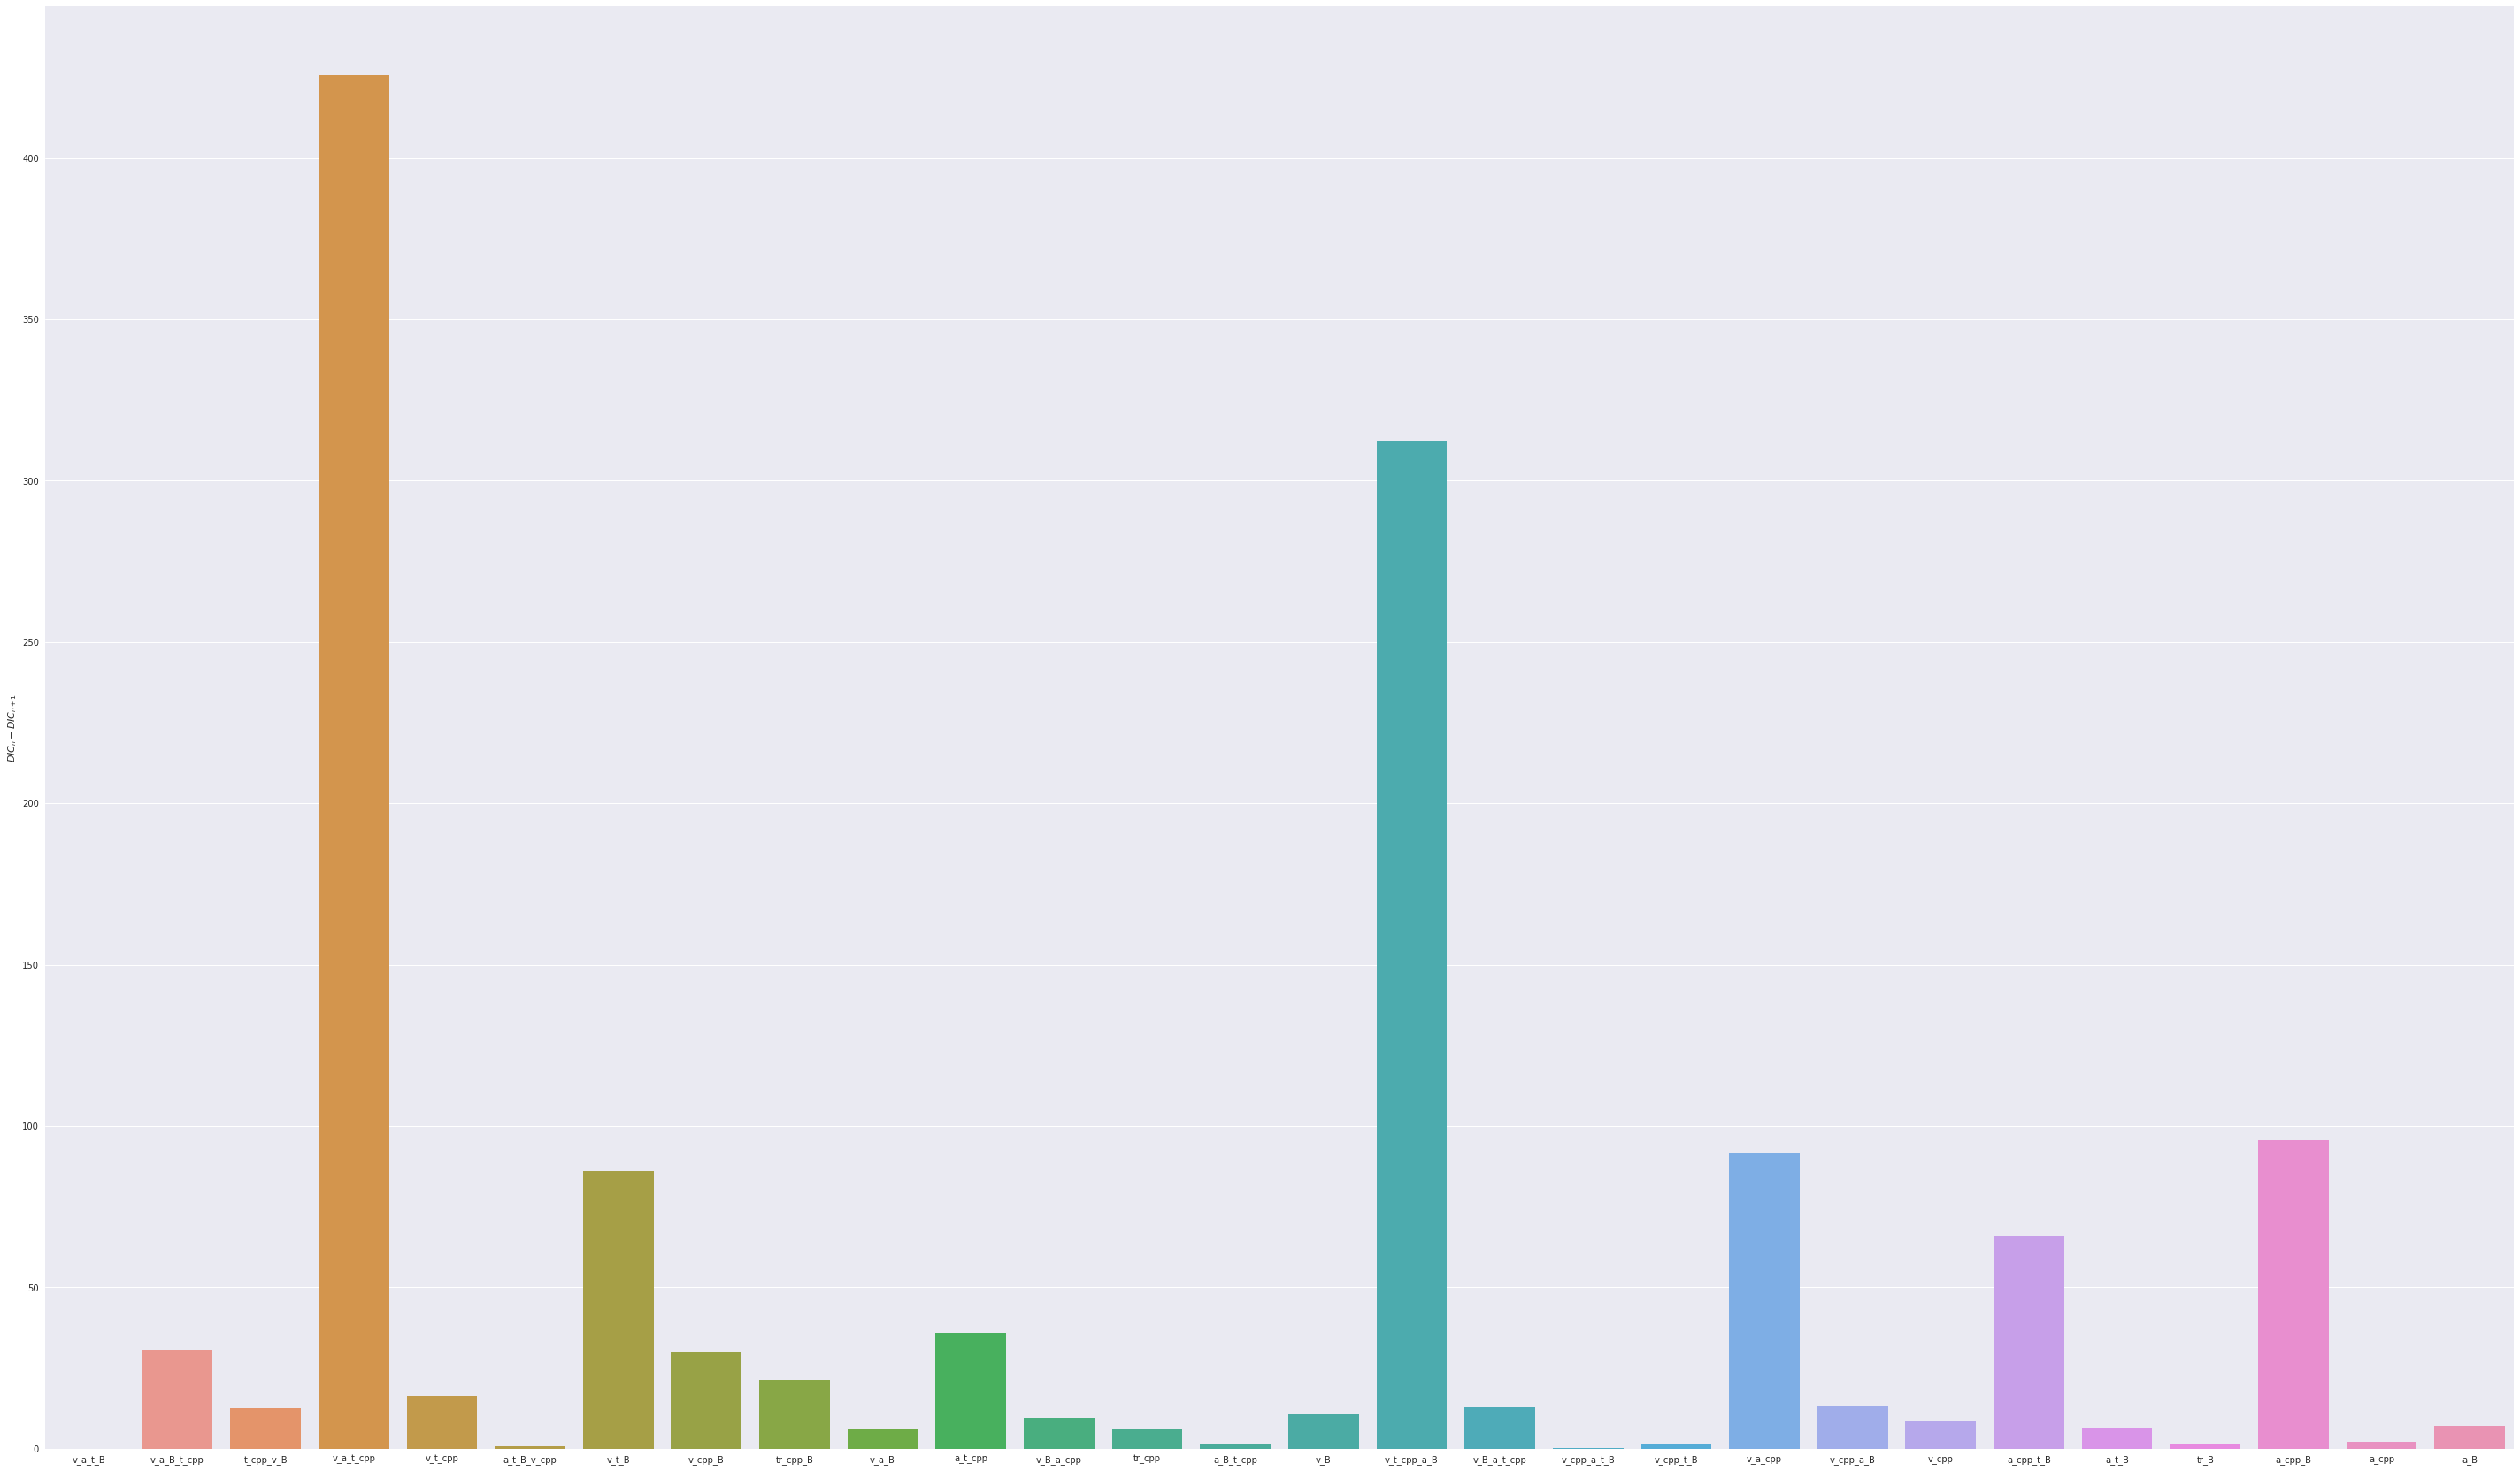

In [20]:
sns.set(font_scale=1)  
plt.figure(figsize=(50,30))
ax=sns.barplot(data=all_dics_diff)
ax.set(ylabel='$DIC_n - DIC_{n+1}$')
# plt.ylim([min(all_di)])
plt.savefig(fig_dir+'all_obs_reg_models_dic_diffs.pdf')

In [21]:
#extract estimates of best model and find rts using these estimates 
# v_a_t_B_subj_obs_reg.nodes_db

In [22]:
 v_a_t_B_subj_obs_reg.nodes_db.ix['a_Intercept', 'node'].trace().mean()
 v_a_t_B_subj_obs_reg.nodes_db.ix['v_Intercept', 'node'].trace().mean()
 v_a_t_B_subj_obs_reg.nodes_db.ix['t_Intercept', 'node'].trace().mean()

0.11600327648508876

In [23]:
aRegressors = ['a_Intercept', "a_B:C(condition)[hc]", 
               "a_B:C(condition)[lc]", "a_B:C(condition)[hv]","a_B:C(condition)[lv]"]
vRegressors = ['v_Intercept', "v_B:C(condition)[hc]", "v_B:C(condition)[lc]",
               "v_B:C(condition)[hv]", "v_B:C(condition)[lv]"]
tRegressors = ['t_Intercept', "t_B:C(condition)[hc]", "t_B:C(condition)[lc]",
               "t_B:C(condition)[hv]", "t_B:C(condition)[lv]"]

regressors = [aRegressors, vRegressors,tRegressors]
pdists = []; lvls = ['hc', 'lc', 'hv', 'lv']; params = ['a', 'v','t']
for param, paramRegs in zip(params, regressors):
    traces = v_a_t_B_subj_obs_reg.nodes_db.ix[paramRegs, 'node']
    c0 = traces[0].trace().mean()
    condTraces = traces[1:]
    pdist = pd.DataFrame({lvl:cTrace.trace() for (lvl, cTrace) in zip(lvls, condTraces)})
    pdistTidy = pd.melt(pdist, var_name='level')
    pdistTidy['param'] = param
    pdists.append(pdistTidy)
pdists = pd.concat(pdists)
vdists = pdists[pdists.param=='v']
adists = pdists[pdists.param=='a']
tdists = pdists[pdists.param=='t']

In [24]:
# v_a_t_B_subj_obs_reg.print_stats()

In [25]:
v0 = v_a_t_B_subj_obs_reg.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc = v_a_t_B_subj_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc = v_a_t_B_subj_obs_reg.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv = v_a_t_B_subj_obs_reg.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv = v_a_t_B_subj_obs_reg.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

In [26]:
t0 = v_a_t_B_subj_obs_reg.nodes_db.ix[['t_Intercept'], 'mean'][0]
t_beta_hc = v_a_t_B_subj_obs_reg.nodes_db.ix[['t_B:C(condition)[hc]'], 'mean'][0]
t_beta_lc = v_a_t_B_subj_obs_reg.nodes_db.ix[['t_B:C(condition)[lc]'], 'mean'][0]
t_beta_hv = v_a_t_B_subj_obs_reg.nodes_db.ix[['t_B:C(condition)[hv]'], 'mean'][0]
t_beta_lv = v_a_t_B_subj_obs_reg.nodes_db.ix[['t_B:C(condition)[lv]'], 'mean'][0]

In [27]:
a0 = v_a_t_B_subj_obs_reg.nodes_db.ix[['a_Intercept'], 'mean'][0]
a_beta_hc = v_a_t_B_subj_obs_reg.nodes_db.ix[['a_B:C(condition)[hc]'], 'mean'][0]
a_beta_lc = v_a_t_B_subj_obs_reg.nodes_db.ix[['a_B:C(condition)[lc]'], 'mean'][0]
a_beta_hv = v_a_t_B_subj_obs_reg.nodes_db.ix[['a_B:C(condition)[hv]'], 'mean'][0]
a_beta_lv = v_a_t_B_subj_obs_reg.nodes_db.ix[['a_B:C(condition)[lv]'], 'mean'][0]

In [28]:
print(a0, a_beta_hc, a_beta_lc, a_beta_hv, a_beta_lv)

1.02049506276 0.0086281813141 0.0211973053369 0.00205023136044 0.0123031410113


In [29]:
print(v0, v_beta_hc, v_beta_lc, v_beta_hv, v_beta_lv)

0.665208082078 0.0575993499528 0.272933495066 0.0216070628318 0.254012412963


In [30]:
v0, a0, t0

(0.66520808207763238, 1.0204950627608562, 0.11600327648508876)

In [31]:
vdists.value = vdists.value + v0
adists.value = adists.value + a0
tdists.value = tdists.value + t0

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [32]:
all_data = hddm.load_csv(home+'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')  
data = all_data[['p_id_accuracy', 'rt', 'condition', 'ID', 'choice_B', 'cpp']] 
data = data.rename(index=str, columns={"p_id_accuracy": "response", "ID": "subj_idx"})
data.columns = data.columns.str.strip()
data = hddm.utils.flip_errors(data)
data.head()

,response,rt,condition,subj_idx,choice_B,cpp
0,1.0,0.711570,hc,761,0.000000,0.099471
1,0.0,-0.681410,hc,761,0.000000,0.035079
2,1.0,0.767118,hc,761,1.241007,0.023075
3,0.0,-0.507209,hc,761,0.595781,0.019881
4,1.0,0.656259,hc,761,0.306135,0.018539


In [33]:
#given these estimates, find rts and accuracies
v_hc = v0 + v_beta_hc
v_lc = v0 + v_beta_lc
v_hv = v0 + v_beta_hv
v_lv = v0 + v_beta_lv

print(v_hc, v_lc, v_hv, v_lv)


a_hc = a0 + a_beta_hc
a_lc = a0 + a_beta_lc
a_hv = a0 + a_beta_hv
a_lv = a0 + a_beta_lv

print(a_hc, a_lc, a_hv, a_lv)

t_hc = t0 + t_beta_hc
t_lc = t0 + t_beta_lc
t_hv = t0 + t_beta_hv
t_lv = t0 + t_beta_lv

print(t_hc, t_lc, t_hv, t_lv)

0.72280743203 0.938141577143 0.686815144909 0.919220495041
1.02912324407 1.0416923681 1.02254529412 1.03279820377
0.112666883481 0.116212935093 0.117285943311 0.115642880351


## Parameter distributions as a function of volatility and conflict  

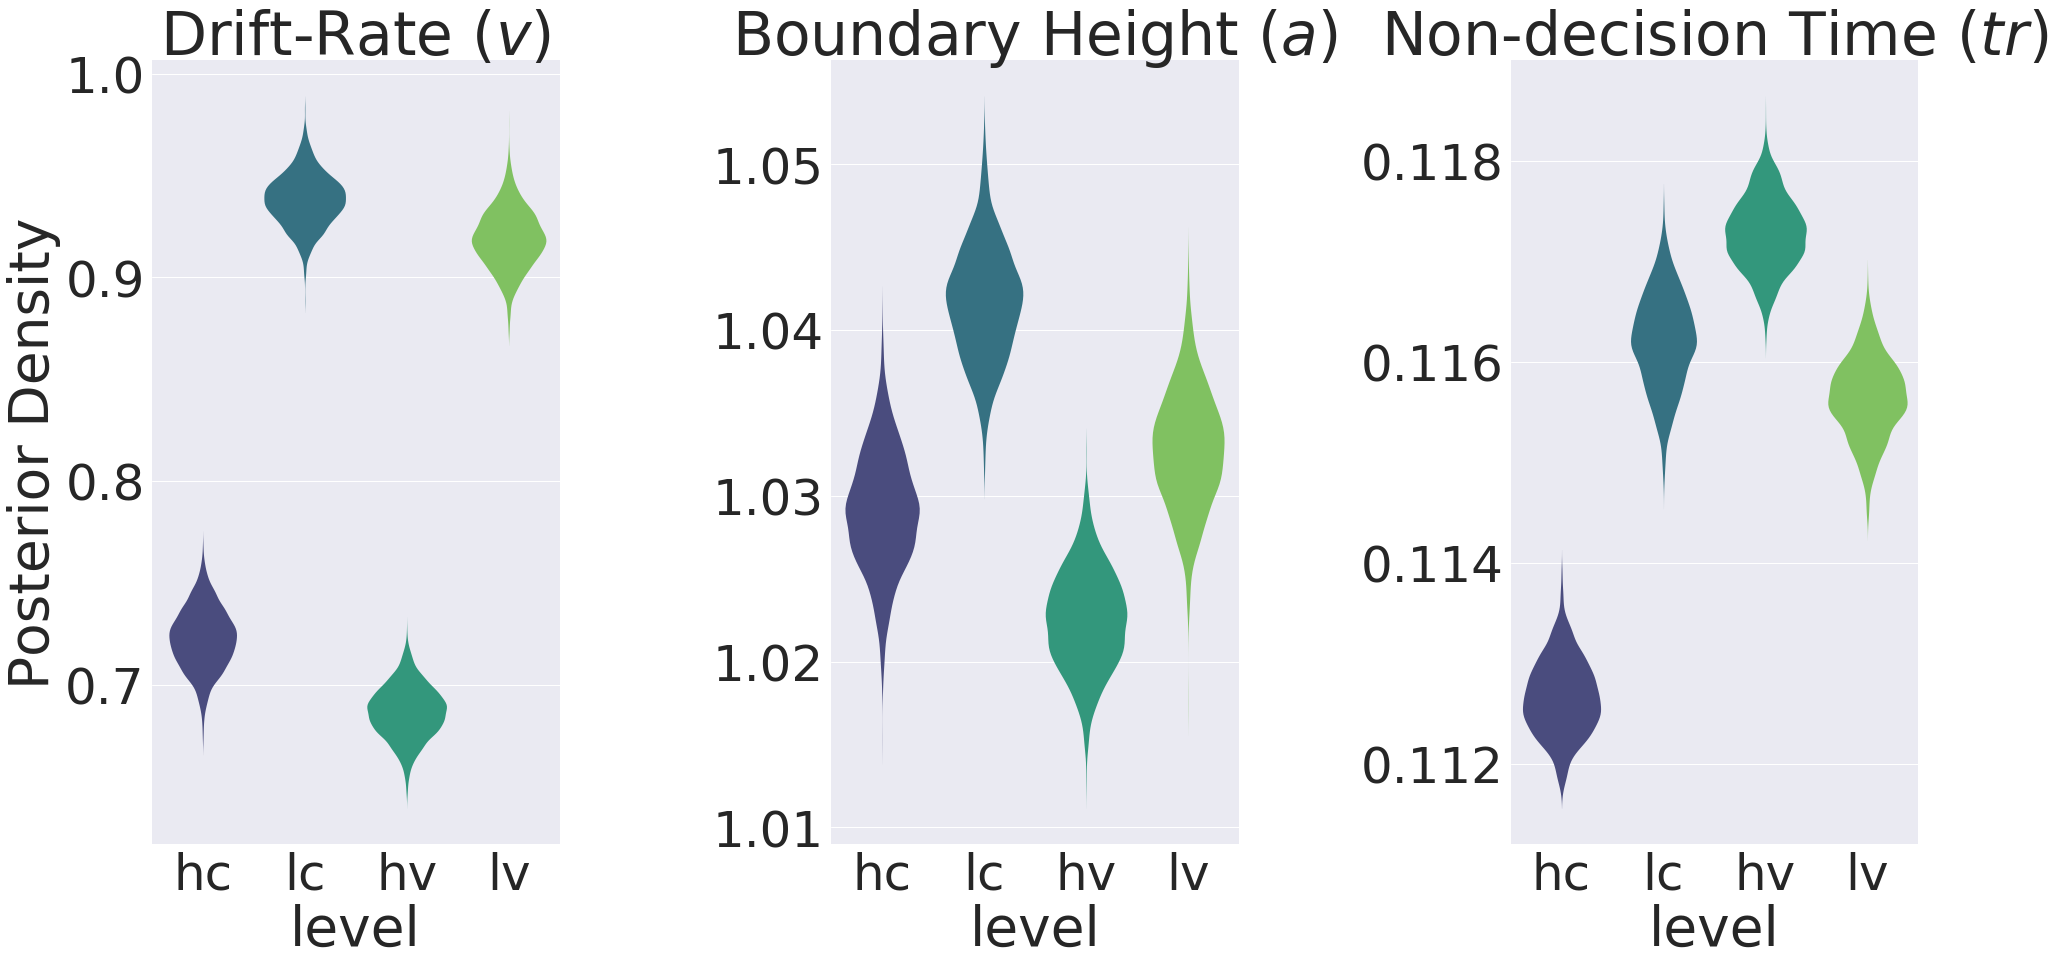

In [34]:
sns.set(font_scale=5)  

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 15))
                             
sns.violinplot(x='level', y='value', data=vdists, palette='viridis', order=lvls, ax=ax1, linewidth=0)
sns.violinplot(x='level', y='value', data=adists, palette='viridis', order=lvls, ax=ax2, linewidth=0)
sns.violinplot(x='level', y='value', data=tdists, palette='viridis', order=lvls, ax=ax3, linewidth=0)

ax1.set_ylabel('Posterior Density')
ax2.set_ylabel('')
ax3.set_ylabel('')

ax1.set_title('Drift-Rate ($v$)')
ax2.set_title('Boundary Height ($a$)')
ax3.set_title('Non-decision Time ($tr$)')

plt.tight_layout()
sns.despine()

In [ ]:
#if belief goes up, does parameter go down? for all parameters 

* The DIC analysis above indicates that belief is the learning signal which covaries with all considered parameters. Belief in the value difference between chosen and unchosen targets is most responsible for changes in drift-rate, boundary height, and non-decision time.   
* Because belief is the most informative learning signal, parameters are most sensitive to changes under the least ambiguous conditions (i.e., low volatility & low conflict conditions). 
* The drift-rate decreases under high conflict and high volatility conditions.
* The boundary height increases under conditions of low conflict. 
* Non-decision time decreases in the high conflict condition. This is a bit puzzling. Possible that non-decision processes (motor execution processes, perceptual processing) are refined if the high-conflict decision process is relatively constant (on average / across epochs). 

## Traditional distributions of within-subjects effects for winning model

P(HV > LV) =  0.0108


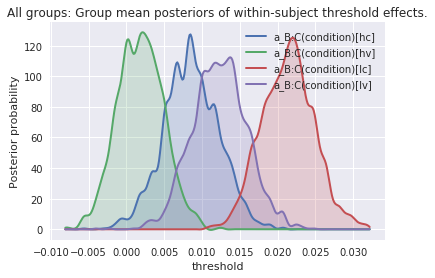

In [35]:
sns.set_style()
sns.set(font_scale=1)  

a_hc, a_hv, a_lc, a_lv = v_a_t_B_subj_obs_reg.nodes_db.ix[['a_B:C(condition)[hc]', 'a_B:C(condition)[hv]', 
                                                             'a_B:C(condition)[lc]', 'a_B:C(condition)[lv]'],
                                                          'node']


bound_fig=hddm.analyze.plot_posterior_nodes([a_hc, a_hv, a_lc, a_lv])
# bound_fig=hddm.analyze.plot_posterior_nodes([a_hv, a_lv])

plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.legend()
plt.title('All groups: Group mean posteriors of within-subject threshold effects.')
# plt.savefig('hddm_demo_fig_07.pdf')
print("P(HV > LV) = ", (a_hv.trace() > a_lv.trace()).mean())

P(HC < LC) =  1.0


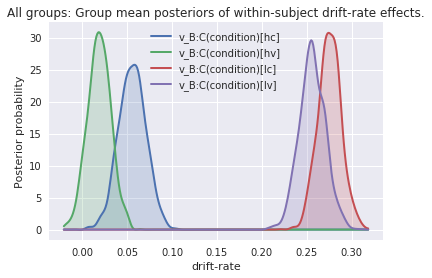

In [36]:
sns.set_style()
sns.set(font_scale=1)  

v_hc, v_hv, v_lc, v_lv = v_a_t_B_subj_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
                                                             'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'], 'node']


drift_fig=hddm.analyze.plot_posterior_nodes([v_hc, v_hv, v_lc, v_lv])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('All groups: Group mean posteriors of within-subject drift-rate effects.')
plt.legend()
# plt.savefig('hddm_demo_fig_07.pdf')
print("P(HC < LC) = ", (v_hc.trace() < v_lc.trace()).mean())

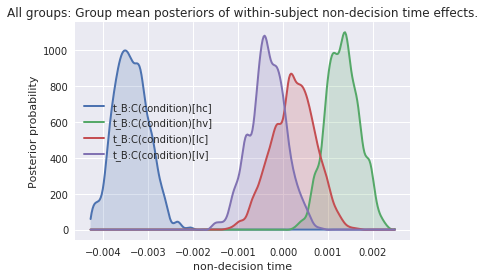

In [37]:
sns.set_style()
sns.set(font_scale=1)  

t_hc, t_hv, t_lc, t_lv = v_a_t_B_subj_obs_reg.nodes_db.ix[['t_B:C(condition)[hc]', 't_B:C(condition)[hv]', 
                                                             't_B:C(condition)[lc]', 't_B:C(condition)[lv]'], 'node']


ndt_fig=hddm.analyze.plot_posterior_nodes([t_hc, t_hv, t_lc, t_lv])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('All groups: Group mean posteriors of within-subject non-decision time effects.')
plt.legend()
# plt.savefig('hddm_demo_fig_07.pdf')

#### Hypothesized contrasts

In [38]:
# tst hyp. that bound ^ with vol
print("P(HV > LV) = ", (a_hv.trace() > a_lv.trace()).mean())
# tst hyp. that drift dec. with conf
print("P(HC < LC) = ", (v_hc.trace() < v_lc.trace()).mean())

P(HV > LV) =  0.0108
P(HC < LC) =  1.0


In [39]:
print("P(LV < LC) = ", (a_lv.trace() < a_lc.trace()).mean())
print("P(LV < HC) = ", (a_lv.trace() < a_hc.trace()).mean())

P(LV < LC) =  0.974
P(LV < HC) =  0.2144


In [40]:
print("P(HC > LV) = ", (v_hc.trace() > v_lv.trace()).mean())
print("P(HC > HV) = ", (v_hc.trace() > v_hv.trace()).mean())

P(HC > LV) =  0.0
P(HC > HV) =  0.9704


## Posterior predictive check 
### How well does the best regression model fit the data? 
#### While the best regression model loses the least information among considered models, can the best model replicate observed distributions? 

In [47]:
v_a_t_B_subj_obs_reg.data.head()

,response,rt,condition,subj_idx,B,cpp
0,1.0,0.711570,hc,761,0.000000,0.099471
1,0.0,-0.681410,hc,761,0.000000,0.035079
2,1.0,0.767118,hc,761,1.241007,0.023075
3,0.0,-0.507209,hc,761,0.595781,0.019881
4,1.0,0.656259,hc,761,0.306135,0.018539
5,1.0,0.342321,hc,761,0.139394,0.268538
6,1.0,0.426794,hc,761,0.027685,0.035630
7,1.0,0.405805,hc,761,0.804363,0.785155
8,1.0,0.317552,hc,761,-0.064818,0.352873
9,0.0,-0.329534,hc,761,2.800194,0.206726


In [90]:
import pymc as pm
import numpy as np
import pymc.progressbar as pbar

def _parents_to_random_posterior_sample(bottom_node, pos=None):
    """Walks through parents and sets them to pos sample."""
    for i, parent in enumerate(bottom_node.extended_parents):
        if not isinstance(parent, pm.Node): # Skip non-stochastic nodes
            continue

        if pos is None:
            # Set to random posterior position
            pos = np.random.randint(0, len(parent.trace()))

        assert len(parent.trace()) >= pos, "pos larger than posterior sample size"
        parent.value = parent.trace()[pos]

def _post_pred_generate(bottom_node, samples=500, data=None, append_data=True):
    """Generate posterior predictive data from a single observed node."""
    datasets = []
    ##############################
    # Sample and generate stats
    for sample in range(samples):
        _parents_to_random_posterior_sample(bottom_node)
        # Generate data from bottom node
        sampled_data = bottom_node.random()
        if append_data and data is not None:
            sampled_data.reset_index(inplace=True)  # Only modification of original Kabuki code
            sampled_data = sampled_data.join(data.reset_index(), lsuffix='_sampled')
        datasets.append(sampled_data)
    return datasets

def post_pred_gen(model, groupby=None, samples=500, append_data=False, progress_bar=True):
    results = {}

    # Progress bar
    if progress_bar:
        n_iter = len(model.get_observeds())
        bar = pbar.progress_bar(n_iter)
        bar_iter = 0
    else:
        print("Sampling...")

    if groupby is None:
        iter_data = ((name, model.data.ix[obs['node'].value.index]) for name, obs in model.iter_observeds())
    else:
        iter_data = model.data.groupby(groupby)

    for name, data in iter_data:
        node = model.get_data_nodes(data.index)

        if progress_bar:
            bar_iter += 1
            bar.update(bar_iter)

        if node is None or not hasattr(node, 'random'):
            continue # Skip

        ##############################
        # Sample and generate stats
        datasets = _post_pred_generate(node, samples=samples, data=data, append_data=append_data)
        results[name] = pd.concat(datasets, names=['sample'], keys=list(range(len(datasets))))

    if progress_bar:
        bar_iter += 1
        bar.update(bar_iter)

    return pd.concat(results, names=['node'])

In [100]:
#simulate new rts and accuracies from the winning regression model 
# ppc_data = post_pred_gen(v_a_t_B_subj_obs_reg, append_data=True,
#                                     progress_bar=True, samples=10
#                                 )
# pd.to_csv('ppc_data.csv', ppc_data)

In [93]:
ppc_data_test = ppc_data.copy()
ppc_data_test.head()

index_sampled  rt_sampled index  response        rt  \
node     sample                                                         
wfpt.761 0      0             0    0.234623     0       1.0  0.711570   
                1             1    0.265623     1       0.0 -0.681410   
                2             2   -0.279025     2       1.0  0.767118   
                3             3    0.399503     3       0.0 -0.507209   
                4             4   -0.574036     4       1.0  0.656259   

                  condition  subj_idx         B       cpp  
node     sample                                            
wfpt.761 0      0        hc       761  0.000000  0.099471  
                1        hc       761  0.000000  0.035079  
                2        hc       761  1.241007  0.023075  
                3        hc       761  0.595781  0.019881  
                4        hc       761  0.306135  0.018539

In [94]:
#if rt is greater than 0, then response was correct (accuracy flipped rts)
# ppc_data_test.loc[(ppc_data_test.rt_sampled > 0),'response'] = 1 
# #if rt is <= 0, then response was incorrect (accuracy flipped rts)
# ppc_data_test.loc[(ppc_data_test.rt_sampled <= 0),'response'] = 0 
# # ppc_data_test['condition'] = v_a_t_B_subj_obs_reg.data.condition.values
# ppc_data_test.head()

In [104]:
ppc_compare = hddm.utils.post_pred_stats(v_a_t_B_subj_obs_reg.data, ppc_data_test)

In [107]:
#upper bound & lowerb ound refer to correct/incorrect rts 
ppc_compare


,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.654339,0.654336,0.087450,8.060968e-12,0.007648,True,33.333332,0.000032
mean_ub,0.327374,0.328023,0.028330,4.213009e-07,0.000803,True,50.000000,0.022911
std_ub,0.100096,0.094787,0.025825,2.819052e-05,0.000695,True,62.500000,0.205594
10q_ub,0.237319,0.241919,0.020950,2.115606e-05,0.000460,True,37.500000,0.219551
30q_ub,0.275208,0.278477,0.022552,1.069134e-05,0.000519,True,45.833332,0.144985
50q_ub,0.304412,0.306462,0.025246,4.203650e-06,0.000642,True,50.000000,0.081211
70q_ub,0.342735,0.344461,0.035190,2.980316e-06,0.001241,True,54.166668,0.049058
90q_ub,0.447173,0.439966,0.065828,5.194480e-05,0.004385,True,54.166668,0.109486
mean_lb,-0.336660,-0.336070,0.029322,3.475345e-07,0.000860,True,45.833332,0.020105


In [63]:
len(ppc_data_test); len(v_a_t_B_subj_obs_reg.data)

57594

In [81]:
from scipy.stats import linregress

orig_regression = linregress(v_a_t_B_subj_obs_reg.data.B, v_a_t_B_subj_obs_reg.data.rt)

Using the re-sampled rt data, check if there is a correlation between the covariate, B, and the rt. If it's true that B updates the bound, then there should be. 

In [ ]:
from scipy.stats import linregress
ppc_regression = []
for (node, sample), sim_data in ppc_data.groupby(level=(0, 1)):
    ppc_regression.append(linregress(sim_data.B, sim_data.rt_sampled)[0]) # slope

orig_regression = linregress(data.trlbytrl, data.rt)[0]

In [ ]:
#compare the rts and accuracies simulated from the model to the observed data
ppc_compare = hddm.utils.post_pred_stats(data, ppc_data)
print(ppc_compare)

## Predicted trial-by-trial variations of parameters (not formatted well atm)

In [ ]:
v_hc_trials = v0 + v_beta_hc * data[data.condition=='hc']['choice_B'] 
v_lc_trials = v0 + v_beta_lc * data[data.condition=='lc']['choice_B'] 
v_hv_trials = v0 + v_beta_hc * data[data.condition=='hv']['choice_B'] 
v_lv_trials = v0 + v_beta_lc * data[data.condition=='lv']['choice_B'] 


plt.plot(v_hc_trials[:50].values, label='hc')
plt.plot(v_lc_trials[:50].values, label='lc')
plt.plot(v_hv_trials[:50].values, label='hv')
plt.plot(v_lv_trials[:50].values, label='lv')

ax = plt.gca()
ax.set_ylabel('Drift-Rate')
ax.set_xlabel('Trials')
ax.legend()

In [ ]:
a_hc_trials = a0 + a_beta_hc * data[data.condition=='hc']['choice_B'] 
a_lc_trials = a0 + a_beta_lc * data[data.condition=='lc']['choice_B'] 
a_hv_trials = a0 + a_beta_hc * data[data.condition=='hv']['choice_B'] 
a_lv_trials = a0 + a_beta_lc * data[data.condition=='lv']['choice_B'] 


plt.plot(a_hc_trials[:50].values, label='hc')
plt.plot(a_lc_trials[:50].values, label='lc')
plt.plot(a_hv_trials[:50].values, label='hv')
plt.plot(a_lv_trials[:50].values, label='lv')

ax = plt.gca()
ax.set_ylabel('Threshold')
ax.set_xlabel('Trials')
ax.legend()

### Check convergence

In [ ]:
v_a_t_B_subj_obs_reg.plot_posteriors()